# Pytorch Deep Learning
This project file tests different Deep Learning Methods as found in [this book](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf). The goal is to show that a network can be trained to one task, and will __out-perform an untrained network on other similar tasks__!

In [2]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,sys,warnings,datetime,time,itertools,math

import torch
import torch.nn as nn
from torch.nn import functional as F

from torchvision import models,transforms

from PIL import Image

from skimage.util import random_noise

In [3]:
resnet = models.resnet101(pretrained=True)
resnet.eval()

/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
with open('./../../../../../../../../Dropbox/Documents/Text Documents/ResNetLabels.rtf','r') as f:
    labels = [k[:-2].strip() for k in f.readlines() if not (k.startswith('{\\') or k.startswith('\\') or len(k.strip())==0)]

In [5]:
I = Image.open('../../../../../../../../Dropbox/Camera Uploads/cat.jpeg')

In [6]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5,0.45,0.4],
        std=[0.2,0.2,0.2]
    )
])

In [13]:
It = I.copy()

for i in range(round(It.size[0]*It.size[1]/2)):
    It.putpixel(
        (
            rnd.randint(0,It.size[0]-1),
            rnd.randint(0,It.size[1]-1)),
            (rnd.randint(0,255),rnd.randint(0,255),rnd.randint(0,255)
        )
    )

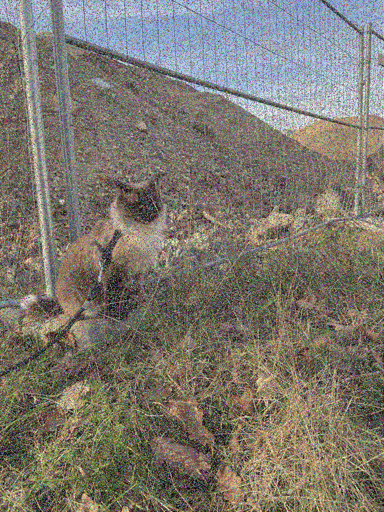

In [14]:
display(It.resize([
    It.size[0]//2,
    It.size[1]//2
]))

In [15]:
batch_t = torch.unsqueeze(preprocess(It),0)
out = resnet(batch_t)

maxlabel_pos = out.argmax().numpy()
print('{1:.4}: {0}'.format(labels[maxlabel_pos],float(F.softmax(out)[0,maxlabel_pos].detach().numpy())))

0.305: lynx


/var/folders/3l/h5txsrx128z_kjh049xwhtqh0000gn/T/ipykernel_2841/3555141963.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print('{1:.4}: {0}'.format(labels[maxlabel_pos],float(F.softmax(out)[0,maxlabel_pos].detach().numpy())))
